In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv

firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 1000    

data = []  
url = "https://app.thestorygraph.com/book_reviews/4d0ec247-c054-4e6e-ad15-459003b999c3"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

AngelsAndDemons_Book = pd.DataFrame(data, columns=["bURL", "bRating", "bReview"])


5.0
I've watched the movie recently so I've decided to re-read this book and I am surprised by how much I see it now compared to how I felt when I read it 2 years ago.
This book raised controversial issues regarding the foundations of Christianity and frankly, it was too much to unpack.
Still, I've enjoyed it the like the first time.
4.0
Δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσει Dan Brown, δεν έτυχε; Δεν το σκέφτηκα γιατί διάβαζα άλλα; Δεν ξέρω. Ευτυχώς τα κέρδισα απο έναν διαγωνισμό στο ραδιόφωνο και ξεκίνησα ήδη αυτό το υπέροχο ταξίδι. Είχα πολύ καιρό να μείνω ξύπνια γιατί ήθελα να μάθω την συνέχεια. Αν έχεις ελεύθερο χρόνο, άνετα το διαβάσεις μεσα σε δυο μέρες. Απλά υπέροχο, τόσο περιγραφικός όσο πρέπει, για να βλέπεις και εσύ με τα μάτια του πρωταγωνιστή που είναι και τι βλέπει. Βλέπεις μπροστά σου και ζεις μέσα στην αιώνια πόλη και το Βατικανό, ανατροπές, ένταση, αγωνία. Αν αγαπάς τα βιβλία περιπέτειας, τότε δεν πρέπει να λείπει απο την βιβλιοθήκη σου! Ενα βιβλίο γεμάτο ιστορικά

In [223]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 195 
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt0808151/reviews/?ref_=tt_ql_2"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="content"]')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

AngelsAndDemons_Movie = pd.DataFrame(data, columns=["mURL", "mRating", "mReview"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Button clicked
Collected 19 reviews
Collected 20 reviews
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 reviews
Collected 47 

**AngelsAndDemons Analysis**

In [184]:
AngelsAndDemons_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bURL     1000 non-null   object
 1   bRating  1000 non-null   object
 2   bReview  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [54]:
AngelsAndDemons_Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mURL     195 non-null    object
 1   mRating  195 non-null    object
 2   mReview  195 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


Data clean and Transformation

In [185]:
#Checking null values

missing_counts = AngelsAndDemons_Book.isnull().sum()
print(missing_counts)

bURL       0
bRating    0
bReview    0
dtype: int64


In [55]:
#Checking null values

missing_counts = AngelsAndDemons_Movie.isnull().sum()
print(missing_counts)

mURL       0
mRating    0
mReview    0
dtype: int64


In [186]:
#since no null values I'll convert the ratings column to float
AngelsAndDemons_Book['bRating'] = AngelsAndDemons_Book['bRating'].astype('float') 
AngelsAndDemons_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bURL     1000 non-null   object 
 1   bRating  1000 non-null   float64
 2   bReview  1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [56]:
#since no null values I'll convert the ratings column to float
AngelsAndDemons_Movie['mRating'] = AngelsAndDemons_Movie['mRating'].astype('float') 
AngelsAndDemons_Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mURL     195 non-null    object 
 1   mRating  195 non-null    float64
 2   mReview  195 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.7+ KB


In [187]:
AngelsAndDemons_Book['bRating'].mean()

3.8605

**Based on the ratings given by 195 users the mean is 3.87 out of 5 which states that the book is appreciated by the people.**

In [57]:
AngelsAndDemons_Movie['mRating'].mean()

5.964102564102564

**Based on the ratings given by 1000 users the mean is 5.96 out of 10 which states that the movie is not good as per the book**

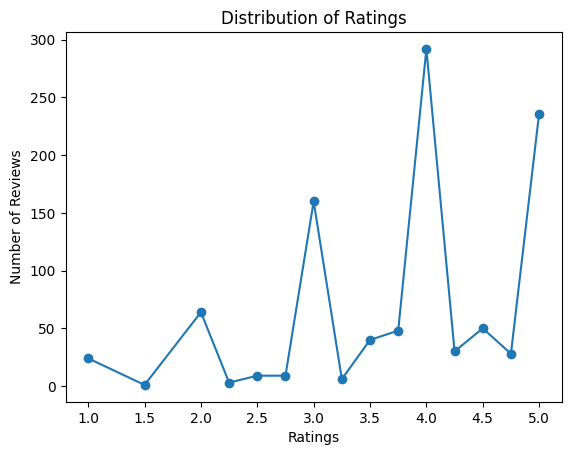

In [189]:
AngelsAndDemons_Counts = AngelsAndDemons_Book['bRating'].value_counts().sort_index()
plt.plot(AngelsAndDemons_Counts.index, AngelsAndDemons_Counts.values, marker='o')

plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')

plt.show()

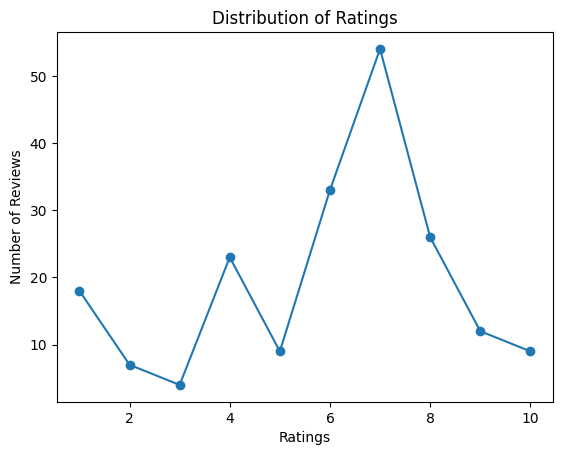

In [59]:
AngelsAndDemonsM_Counts = AngelsAndDemons_Movie['mRating'].value_counts().sort_index()
plt.plot(AngelsAndDemonsM_Counts.index, AngelsAndDemonsM_Counts.values, marker='o')

plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')

plt.show()

In [103]:
value_counts = AngelsAndDemons_Movie['mRating'].value_counts()
value_counts

7.0     54
6.0     33
8.0     26
4.0     23
1.0     18
9.0     12
5.0      9
10.0     9
2.0      7
3.0      4
Name: mRating, dtype: int64

In [190]:
def categorize_reviews(rating):
    if rating <= 2.5:
        return 'Negative'
    elif rating <= 3.5:
        return 'Neutral'
    else:
        return 'Positive'

AngelsAndDemons_Book['bReviewCategory'] = AngelsAndDemons_Book['bRating'].apply(categorize_reviews)

print(AngelsAndDemons_Book)

                                                  bURL  bRating  \
0    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
1    https://app.thestorygraph.com/book_reviews/4d0...      4.0   
2    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
3    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
4    https://app.thestorygraph.com/book_reviews/4d0...      3.0   
..                                                 ...      ...   
995  https://app.thestorygraph.com/book_reviews/4d0...      3.5   
996  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
997  https://app.thestorygraph.com/book_reviews/4d0...      4.0   
998  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
999  https://app.thestorygraph.com/book_reviews/4d0...      2.0   

                                               bReview bReviewCategory  
0    I've watched the movie recently so I've decide...        Positive  
1    Δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσει 

**Categorized book based on the ratings given by the users**

In [144]:
def categorize_reviews(rating):
    if rating <= 4.5:
        return 'Poor'
    elif rating <= 7.5:
        return 'Average'
    else:
        return 'Good'

AngelsAndDemons_Movie['mReviewCategory'] = AngelsAndDemons_Movie['mRating'].apply(categorize_reviews)

print(AngelsAndDemons_Movie)

                                                  mURL  mRating  \
0    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
1    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
2    https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
3    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
4    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
..                                                 ...      ...   
190  https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
191  https://www.imdb.com/title/tt0808151/reviews/?...      9.0   
192  https://www.imdb.com/title/tt0808151/reviews/?...      6.0   
193  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   
194  https://www.imdb.com/title/tt0808151/reviews/?...      7.0   

                                               mReview mReviewCategory  \
0    Tom Hanks returns as Dan Brown's symbologist R...         Average   
1    This is an OK adaptation of the breath tak

**Categorized Book based on the ratings given by the users**

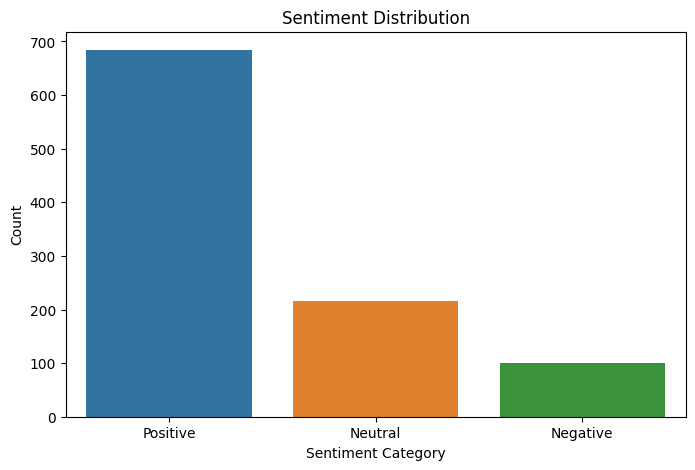

In [191]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Book, x='bReviewCategory')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

plt.savefig('sentiment_distribution.jpg', dpi=300)
plt.show()


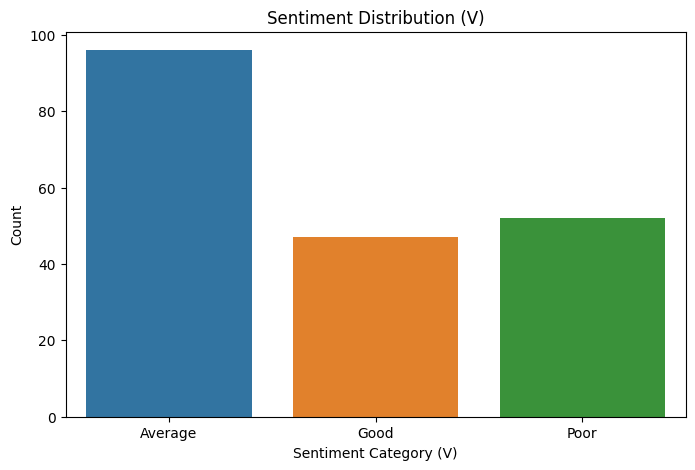

In [146]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Movie, x='mReviewCategory')
plt.title('Sentiment Distribution (V)')
plt.xlabel('Sentiment Category (V)')
plt.ylabel('Count')
plt.show()


In [192]:
unique_counts = AngelsAndDemons_Movie['mReviewCategory'].value_counts()
unique_counts

Average    96
Poor       52
Good       47
Name: mReviewCategory, dtype: int64

**VADER ANALYZER FOR BOOKS**

In [193]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for index, row in AngelsAndDemons_Book.iterrows():
    review_text = row['bReview']
    sentiment_scores = analyzer.polarity_scores(review_text)
    
    if sentiment_scores['compound'] >= 0.05:
        vasentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        vasentiment = 'Negative'
    else:
        vasentiment = 'Neutral'
    
    AngelsAndDemons_Book.at[index, 'VASentiment'] = vasentiment

print(AngelsAndDemons_Book[['bRating','bReview', 'VASentiment']])


     bRating                                            bReview VASentiment
0        5.0  I've watched the movie recently so I've decide...    Positive
1        4.0  Δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσει Da...     Neutral
2        5.0             I am still shocked. Review to come! :)    Positive
3        5.0  Angels & Demons -\n\nI thought this was a dece...    Positive
4        3.0                              Really smart written.    Positive
..       ...                                                ...         ...
995      3.5        I found this better than The Da Vinci Code.    Positive
996      5.0  Fast paced book, very easy read and highly ent...    Positive
997      4.0  Dan Brown is a hack, albeit a very successful ...    Positive
998      5.0  I absolutely loved this book. To the point I c...    Positive
999      2.0  when archivist and symbologist robert langdon ...    Positive

[1000 rows x 3 columns]


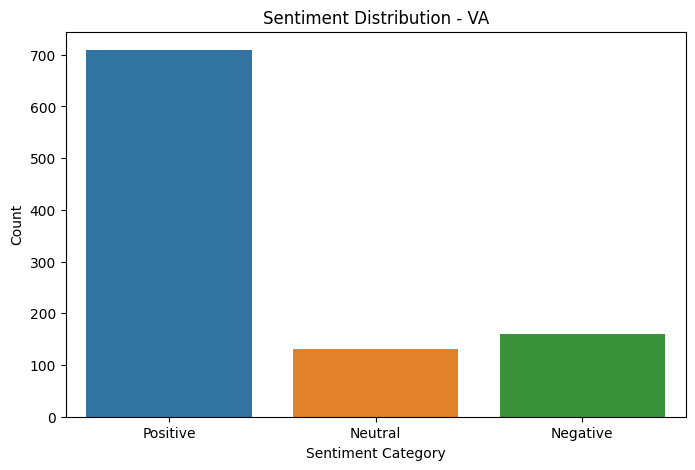

In [194]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=AngelsAndDemons_Book, x='VASentiment')
plt.title('Sentiment Distribution - VA')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


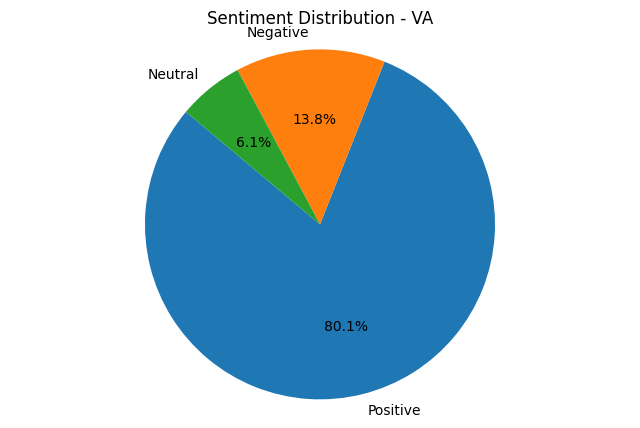

In [225]:
sentiment_counts = AngelsAndDemons_Book['VASentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution - VA')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [195]:
AngelsAndDemons_Book

,bURL,bRating,bReview,bReviewCategory,VASentiment
0,https://app.thestorygraph.com/book_reviews/4d0...,5.0,I've watched the movie recently so I've decide...,Positive,Positive
1,https://app.thestorygraph.com/book_reviews/4d0...,4.0,Δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσει Da...,Positive,Neutral
2,https://app.thestorygraph.com/book_reviews/4d0...,5.0,I am still shocked. Review to come! :),Positive,Positive
3,https://app.thestorygraph.com/book_reviews/4d0...,5.0,Angels & Demons -\n\nI thought this was a dece...,Positive,Positive
4,https://app.thestorygraph.com/book_reviews/4d0...,3.0,Really smart written.,Neutral,Positive
...,...,...,...,...,...
995,https://app.thestorygraph.com/book_reviews/4d0...,3.5,I found this better than The Da Vinci Code.,Neutral,Positive
996,https://app.thestorygraph.com/book_reviews/4d0...,5.0,"Fast paced book, very easy read and highly ent...",Positive,Positive
997,https://app.thestorygraph.com/book_reviews/4d0...,4.0,"Dan Brown is a hack, albeit a very successful ...",Positive,Positive
998,https://app.thestorygraph.com/book_reviews/4d0...,5.0,I absolutely loved this book. To the point I c...,Positive,Positive


**Cleaning of data like removing stop words, emojis and non english language**

In [148]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [197]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text
AngelsAndDemons_Book['PreprocessedReviews'] = AngelsAndDemons_Book['bReview'].apply(preprocess_text)
print(AngelsAndDemons_Book)


                                                  bURL  bRating  \
0    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
1    https://app.thestorygraph.com/book_reviews/4d0...      4.0   
2    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
3    https://app.thestorygraph.com/book_reviews/4d0...      5.0   
4    https://app.thestorygraph.com/book_reviews/4d0...      3.0   
..                                                 ...      ...   
995  https://app.thestorygraph.com/book_reviews/4d0...      3.5   
996  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
997  https://app.thestorygraph.com/book_reviews/4d0...      4.0   
998  https://app.thestorygraph.com/book_reviews/4d0...      5.0   
999  https://app.thestorygraph.com/book_reviews/4d0...      2.0   

                                               bReview bReviewCategory  \
0    I've watched the movie recently so I've decide...        Positive   
1    Δεν ξέρω γιατί μέχρι τώρα δεν είχα διαβάσε

In [150]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text
AngelsAndDemons_Movie['PreprocessedReviews'] = AngelsAndDemons_Movie['mReview'].apply(preprocess_text)
print(AngelsAndDemons_Movie)


                                                  mURL  mRating  \
0    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
1    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
2    https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
3    https://www.imdb.com/title/tt0808151/reviews/?...      7.0   
4    https://www.imdb.com/title/tt0808151/reviews/?...      8.0   
..                                                 ...      ...   
190  https://www.imdb.com/title/tt0808151/reviews/?...      5.0   
191  https://www.imdb.com/title/tt0808151/reviews/?...      9.0   
192  https://www.imdb.com/title/tt0808151/reviews/?...      6.0   
193  https://www.imdb.com/title/tt0808151/reviews/?...      4.0   
194  https://www.imdb.com/title/tt0808151/reviews/?...      7.0   

                                               mReview mReviewCategory  \
0    Tom Hanks returns as Dan Brown's symbologist R...         Average   
1    This is an OK adaptation of the breath tak

In [198]:
from langdetect import detect
def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

AngelsAndDemons_Book['IsEnglish'] = AngelsAndDemons_Book['PreprocessedReviews'].apply(detect_language)
AngelsAndDemons_Book = AngelsAndDemons_Book[AngelsAndDemons_Book['IsEnglish']]


In [152]:
from langdetect import detect
def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

AngelsAndDemons_Movie['IsEnglish'] = AngelsAndDemons_Movie['PreprocessedReviews'].apply(detect_language)
AngelsAndDemons_Movie = AngelsAndDemons_Movie[AngelsAndDemons_Movie['IsEnglish']]


In [199]:
AngelsAndDemons_Book

,bURL,bRating,bReview,bReviewCategory,VASentiment,PreprocessedReviews,IsEnglish
0,https://app.thestorygraph.com/book_reviews/4d0...,5.0,I've watched the movie recently so I've decide...,Positive,Positive,watched movie recently decided book surprised ...,True
2,https://app.thestorygraph.com/book_reviews/4d0...,5.0,I am still shocked. Review to come! :),Positive,Positive,still shocked review come,True
3,https://app.thestorygraph.com/book_reviews/4d0...,5.0,Angels & Demons -\n\nI thought this was a dece...,Positive,Positive,angels demons thought decent read enjoyed char...,True
4,https://app.thestorygraph.com/book_reviews/4d0...,3.0,Really smart written.,Neutral,Positive,really smart written,True
6,https://app.thestorygraph.com/book_reviews/4d0...,4.0,"4.75 stars\nSo, this is a re-read for me BUT I...",Positive,Positive,stars remember anything previous read things m...,True
...,...,...,...,...,...,...,...
991,https://app.thestorygraph.com/book_reviews/4d0...,4.5,This book was lack luster. I'm here for action...,Positive,Negative,book lack luster action adventure conspiracies...,True
996,https://app.thestorygraph.com/book_reviews/4d0...,5.0,"Fast paced book, very easy read and highly ent...",Positive,Positive,fast paced book easy read highly entertaining ...,True
997,https://app.thestorygraph.com/book_reviews/4d0...,4.0,"Dan Brown is a hack, albeit a very successful ...",Positive,Positive,dan brown hack albeit successful hack thought ...,True
998,https://app.thestorygraph.com/book_reviews/4d0...,5.0,I absolutely loved this book. To the point I c...,Positive,Positive,absolutely loved book point could barely put l...,True


In [170]:
##Printing 5 rows of each category
categories = AngelsAndDemons_Book['bReviewCategory'].unique()  
columns_to_print = ['bReview','bReviewCategory','bRating']
for category in categories:
    print(f"Top 5 rows for category: {category}")
    top_5_rows = AngelsAndDemons_Book[AngelsAndDemons_Book['bReviewCategory'] == category][columns_to_print].head(5)
    print(top_5_rows)
    print()

Top 5 rows for category: Neutral
                                              bReview bReviewCategory  bRating
1   I dont know how to feel about this. It felt li...         Neutral      3.0
2   Loved it! Can't wait to read more of Dan Brown...         Neutral      3.0
19  Great book that changed my perspective of Cath...         Neutral      3.0
21  i literally dreaded having free time and not h...         Neutral      3.0
38  Really enjoyed this book. Even with all its te...         Neutral      3.5

Top 5 rows for category: Positive
                                             bReview bReviewCategory  bRating
3  3.75⭐️\n\nRobert Langdon is a professor who fo...        Positive      4.0
4  Very good book!! I did like the chase aspect o...        Positive      4.0
6  Angels and Demons is a book, which makes you s...        Positive      4.0
7  I read this way back when I was still in high ...        Positive      4.5
8  My thoughts for this book:\n\n07:26: the book ...        Positive

In [154]:
AngelsAndDemons_Movie

,mURL,mRating,mReview,mReviewCategory,PreprocessedReviews,IsEnglish
0,https://www.imdb.com/title/tt0808151/reviews/?...,7.0,Tom Hanks returns as Dan Brown's symbologist R...,Average,tom hanks returns dan brown symbologist robert...,True
1,https://www.imdb.com/title/tt0808151/reviews/?...,8.0,This is an OK adaptation of the breath taking ...,Good,ok adaptation breath taking book dan brown ca ...,True
2,https://www.imdb.com/title/tt0808151/reviews/?...,5.0,"I am sorry for all the readers, but I don't kn...",Average,sorry readers know begin let say first big dan...,True
3,https://www.imdb.com/title/tt0808151/reviews/?...,7.0,"As is the case with many films of this ilk, my...",Average,case many films ilk non catholicism got way un...,True
4,https://www.imdb.com/title/tt0808151/reviews/?...,8.0,Symbologist Robert Langdon (Hanks) is called t...,Good,symbologist robert langdon hanks called rome h...,True
...,...,...,...,...,...,...
190,https://www.imdb.com/title/tt0808151/reviews/?...,5.0,I was at the premier of the movie last night i...,Average,premier movie last night rome expert book howe...,True
191,https://www.imdb.com/title/tt0808151/reviews/?...,9.0,The Da Vinci Code movie was received with a mi...,Good,da vinci code movie received mixture enthusias...,True
192,https://www.imdb.com/title/tt0808151/reviews/?...,6.0,Angels and Demons follows on the heels of The ...,Average,angels demons follows heels da vinci code movi...,True
193,https://www.imdb.com/title/tt0808151/reviews/?...,4.0,There may be something to be said for a gettin...,Poor,may something said getting second chance ron h...,True


In [200]:
AngelsAndDemons_Book.to_csv("AngelsAndDemons_Book.csv", index=True)

In [157]:
AngelsAndDemons_Movie.to_csv("AngelsAndDemons_Movie.csv", index=True)

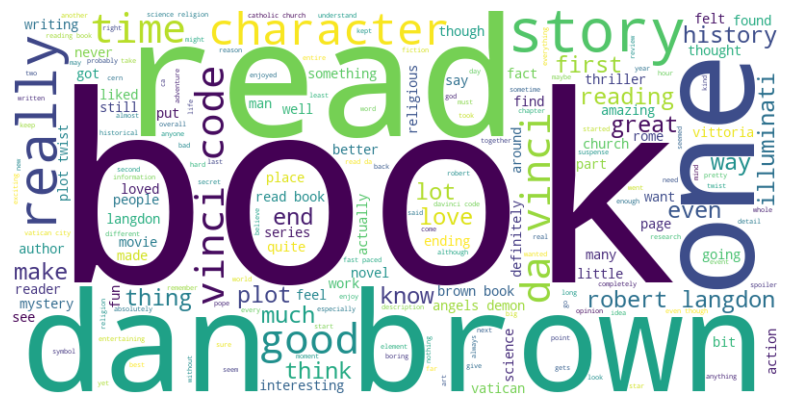

In [201]:
from wordcloud import WordCloud

and_book_reviews = ' '.join(AngelsAndDemons_Book['PreprocessedReviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(and_book_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [95]:
positive_words = ["fact", "really", "story", "ending", "good", "much", "interesting", "great", "amazing", "exciting", "right"]
def count_positive_words(review):
    review = review.lower() 
    words = review.split()
    positive_word_count = sum(1 for word in words if word in positive_words)
    return positive_word_count

# Apply the function to the 'Review' column and create a new column 'Positive_Word_Count'
Positive_Word_Count = AngelsAndDemons_Book['PreprocessedReviews'].apply(count_positive_words)


In [160]:
for index, value in Positive_Word_Count.items():
    print(f"Review {index}: {value}")

Review 1: 2
Review 2: 0
Review 3: 2
Review 4: 1
Review 6: 1
Review 7: 1
Review 8: 5
Review 11: 2
Review 12: 0
Review 13: 0
Review 14: 1
Review 15: 2
Review 16: 0
Review 17: 2
Review 18: 0
Review 19: 3
Review 20: 1
Review 21: 0
Review 23: 0
Review 25: 2
Review 26: 4
Review 27: 0
Review 28: 2
Review 29: 34
Review 30: 0
Review 31: 0
Review 36: 15
Review 38: 2
Review 40: 2
Review 41: 3
Review 43: 2
Review 44: 1
Review 45: 5
Review 46: 0
Review 47: 1
Review 48: 3
Review 50: 1
Review 51: 1
Review 52: 3
Review 53: 0
Review 54: 3
Review 55: 2
Review 56: 2
Review 57: 0
Review 58: 2
Review 59: 1
Review 62: 0
Review 63: 1
Review 64: 1
Review 66: 0
Review 67: 0
Review 68: 1
Review 69: 0
Review 70: 1
Review 71: 0
Review 72: 0
Review 73: 1
Review 74: 0
Review 75: 0
Review 76: 0
Review 77: 1
Review 78: 1
Review 79: 4
Review 80: 0
Review 81: 0
Review 83: 0
Review 84: 1
Review 85: 3
Review 87: 0
Review 88: 1
Review 89: 2
Review 90: 0
Review 91: 1
Review 92: 4
Review 93: 7
Review 94: 0
Review 97: 1
Revi

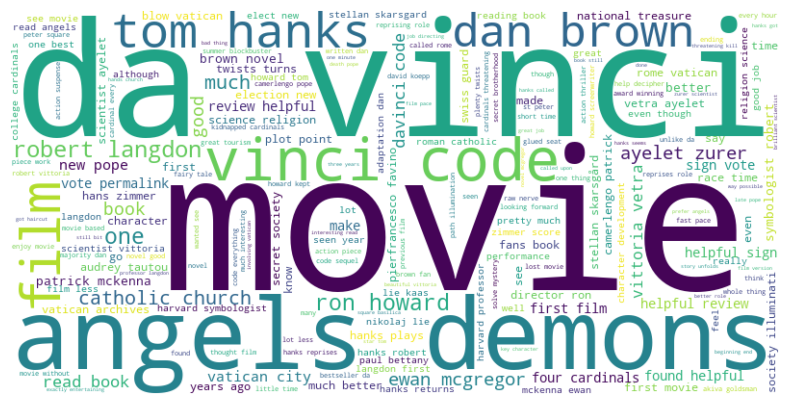

In [70]:
from wordcloud import WordCloud

abc_book_reviews = ' '.join(AngelsAndDemons_Movie['PreprocessedReviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(abc_book_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [202]:
AngelsAndDemons_Book.head()

,bURL,bRating,bReview,bReviewCategory,VASentiment,PreprocessedReviews,IsEnglish
0,https://app.thestorygraph.com/book_reviews/4d0...,5.0,I've watched the movie recently so I've decide...,Positive,Positive,watched movie recently decided book surprised ...,True
2,https://app.thestorygraph.com/book_reviews/4d0...,5.0,I am still shocked. Review to come! :),Positive,Positive,still shocked review come,True
3,https://app.thestorygraph.com/book_reviews/4d0...,5.0,Angels & Demons -\n\nI thought this was a dece...,Positive,Positive,angels demons thought decent read enjoyed char...,True
4,https://app.thestorygraph.com/book_reviews/4d0...,3.0,Really smart written.,Neutral,Positive,really smart written,True
6,https://app.thestorygraph.com/book_reviews/4d0...,4.0,"4.75 stars\nSo, this is a re-read for me BUT I...",Positive,Positive,stars remember anything previous read things m...,True


**Multinomial NB Analysis of the Book**

In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report
train_data, test_data = train_test_split(AngelsAndDemons_Book, test_size=0.2, random_state = 42)
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['PreprocessedReviews'])
X_test = tfidf_vectorizer.transform(test_data['PreprocessedReviews'])
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, train_data['VASentiment'])
predictions = nb_classifier.predict(X_test)
accuracy = accuracy_score(test_data['VASentiment'], predictions)
ADNB = classification_report(test_data['VASentiment'], predictions, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(ADNB)


Accuracy: 0.81
              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00        22
     Neutral       1.00      0.00      0.00         8
    Positive       0.81      1.00      0.90       128

    accuracy                           0.81       158
   macro avg       0.94      0.33      0.30       158
weighted avg       0.85      0.81      0.73       158



In [213]:
train_data, test_data = train_test_split(AngelsAndDemons_Movie, test_size=0.2, random_state = 42)
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['PreprocessedReviews'])
X_test = tfidf_vectorizer.transform(test_data['PreprocessedReviews'])
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, train_data['mReviewCategory'])
predictions = nb_classifier.predict(X_test)
accuracy = accuracy_score(test_data['mReviewCategory'], predictions)
ADNM = classification_report(test_data['mReviewCategory'], predictions,  zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(ADNM)

Accuracy: 0.85
              precision    recall  f1-score   support

     Average       0.76      1.00      0.86        19
        Good       1.00      0.75      0.86        12
        Poor       1.00      0.62      0.77         8

    accuracy                           0.85        39
   macro avg       0.92      0.79      0.83        39
weighted avg       0.88      0.85      0.84        39



**Descision Tree Classifier**

In [214]:
train_data, test_data = train_test_split(AngelsAndDemons_Book, test_size=0.2, random_state = 42)
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['PreprocessedReviews'])
X_test = tfidf_vectorizer.transform(test_data['PreprocessedReviews'])
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, train_data['VASentiment'])
predictions = dt_classifier.predict(X_test)
accuracy = accuracy_score(test_data['VASentiment'], predictions)
ADNBDT = classification_report(test_data['VASentiment'], predictions)

print(f"Accuracy: {accuracy:.2f}")
print(ADNBDT)

Accuracy: 0.77
              precision    recall  f1-score   support

    Negative       0.35      0.32      0.33        22
     Neutral       0.00      0.00      0.00         8
    Positive       0.84      0.89      0.86       128

    accuracy                           0.77       158
   macro avg       0.40      0.40      0.40       158
weighted avg       0.73      0.77      0.75       158



In [222]:
train_data, test_data = train_test_split(AngelsAndDemons_Movie, test_size=0.2, random_state = 42)
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['PreprocessedReviews'])
X_test = tfidf_vectorizer.transform(test_data['PreprocessedReviews'])
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, train_data['mReviewCategory'])
predictions = dt_classifier.predict(X_test)
accuracy = accuracy_score(test_data['mReviewCategory'], predictions)
ADNMDT = classification_report(test_data['mReviewCategory'], predictions)

print(f"Accuracy: {accuracy:.2f}")
print(ADNMDT)

Accuracy: 0.92
              precision    recall  f1-score   support

     Average       0.90      0.95      0.92        19
        Good       1.00      0.92      0.96        12
        Poor       0.88      0.88      0.88         8

    accuracy                           0.92        39
   macro avg       0.92      0.91      0.92        39
weighted avg       0.93      0.92      0.92        39



**SVM**

In [218]:
train_data, test_data = train_test_split(AngelsAndDemons_Book, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['PreprocessedReviews'])
X_test = tfidf_vectorizer.transform(test_data['PreprocessedReviews'])
svm_classifier = SVC()
svm_classifier.fit(X_train, train_data['VASentiment'])
predictions = svm_classifier.predict(X_test)
accuracy = accuracy_score(test_data['VASentiment'], predictions)
test_data['PredictedCategory'] = predictions
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(test_data['VASentiment'], predictions, zero_division=1))


Accuracy: 0.81
              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00        22
     Neutral       1.00      0.00      0.00         8
    Positive       0.81      1.00      0.90       128

    accuracy                           0.81       158
   macro avg       0.94      0.33      0.30       158
weighted avg       0.85      0.81      0.73       158



In [118]:
train_data, test_data = train_test_split(AngelsAndDemons_Movie, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['PreprocessedReviews'])
X_test = tfidf_vectorizer.transform(test_data['PreprocessedReviews'])
svm_classifier = SVC()
svm_classifier.fit(X_train, train_data['mReviewCategory'])
predictions = svm_classifier.predict(X_test)
accuracy = accuracy_score(test_data['mReviewCategory'], predictions)
test_data['PredictedCategory'] = predictions
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(test_data['mReviewCategory'], predictions, zero_division=1))


Accuracy: 0.95
              precision    recall  f1-score   support

     Average       0.90      1.00      0.95        19
        Good       1.00      0.92      0.96        12
        Poor       1.00      0.88      0.93         8

    accuracy                           0.95        39
   macro avg       0.97      0.93      0.95        39
weighted avg       0.95      0.95      0.95        39



**Random Forest**

In [227]:
train_data, test_data = train_test_split(AngelsAndDemons_Book, test_size=0.2, random_state = 42)
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['PreprocessedReviews'])
X_test = tfidf_vectorizer.transform(test_data['PreprocessedReviews'])
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, train_data['VASentiment'])
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(test_data['VASentiment'], predictions)
ADNBRF = classification_report(test_data['VASentiment'], predictions, zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(ADNBRF)


Accuracy: 0.82
              precision    recall  f1-score   support

    Negative       1.00      0.05      0.09        22
     Neutral       1.00      0.00      0.00         8
    Positive       0.82      1.00      0.90       128

    accuracy                           0.82       158
   macro avg       0.94      0.35      0.33       158
weighted avg       0.85      0.82      0.74       158



In [165]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
book_train, book_test = train_test_split(AngelsAndDemons_Book, test_size=0.2, random_state=42)
movie_train, movie_test = train_test_split(AngelsAndDemons_Movie, test_size=0.2, random_state=42)

# Step 3: Feature Extraction
# Use TF-IDF vectorization to convert text data into numerical features for both datasets.
tfidf_vectorizer = TfidfVectorizer()
book_train_features = tfidf_vectorizer.fit_transform(book_train['PreprocessedReviews'])
book_test_features = tfidf_vectorizer.transform(book_test['PreprocessedReviews'])
movie_train_features = tfidf_vectorizer.fit_transform(movie_train['PreprocessedReviews'])
movie_test_features = tfidf_vectorizer.transform(movie_test['PreprocessedReviews'])

# Step 4: Model Training
# Train different sentiment analysis models for both book and movie reviews.
# Decision Tree
dt_model_book = DecisionTreeClassifier(random_state=42)
dt_model_book.fit(book_train_features, book_train['bReviewCategory'])
dt_model_movie = DecisionTreeClassifier(random_state=42)
dt_model_movie.fit(movie_train_features, movie_train['mReviewCategory'])

# Naive Bayes
nb_model_book = MultinomialNB()
nb_model_book.fit(book_train_features, book_train['bReviewCategory'])
nb_model_movie = MultinomialNB()
nb_model_movie.fit(movie_train_features, movie_train['mReviewCategory'])

# SVM
svm_model_book = SVC(kernel='linear', random_state=42)
svm_model_book.fit(book_train_features, book_train['bReviewCategory'])
svm_model_movie = SVC(kernel='linear', random_state=42)
svm_model_movie.fit(movie_train_features, movie_train['mReviewCategory'])

# KNN
knn_model_book = KNeighborsClassifier()
knn_model_book.fit(book_train_features, book_train['bReviewCategory'])
knn_model_movie = KNeighborsClassifier()
knn_model_movie.fit(movie_train_features, movie_train['mReviewCategory'])

# Step 5: Model Evaluation
# Evaluate the models using accuracy, classification report, and confusion matrix for both datasets.
def evaluate_model(model, features, labels, dataset_name):
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    report = classification_report(labels, predictions, zero_division=1)
    conf_matrix = confusion_matrix(labels, predictions)
    print(f"Model Evaluation for {dataset_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

evaluate_model(dt_model_book, book_test_features, book_test['bReviewCategory'], "Book Reviews (Decision Tree)")
evaluate_model(nb_model_book, book_test_features, book_test['bReviewCategory'], "Book Reviews (Naive Bayes)")
evaluate_model(svm_model_book, book_test_features, book_test['bReviewCategory'], "Book Reviews (SVM)")
evaluate_model(knn_model_book, book_test_features, book_test['bReviewCategory'], "Book Reviews (KNN)")

evaluate_model(dt_model_movie, movie_test_features, movie_test['mReviewCategory'], "Movie Reviews (Decision Tree)")
evaluate_model(nb_model_movie, movie_test_features, movie_test['mReviewCategory'], "Movie Reviews (Naive Bayes)")
evaluate_model(svm_model_movie, movie_test_features, movie_test['mReviewCategory'], "Movie Reviews (SVM)")
evaluate_model(knn_model_movie, movie_test_features, movie_test['mReviewCategory'], "Movie Reviews (KNN)")


Model Evaluation for Book Reviews (Decision Tree):
Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

    Negative       0.07      0.05      0.06        20
     Neutral       0.21      0.18      0.20        33
    Positive       0.66      0.74      0.70       102

    accuracy                           0.53       155
   macro avg       0.32      0.32      0.32       155
weighted avg       0.49      0.53      0.51       155

Confusion Matrix:
[[ 1  4 15]
 [ 4  6 23]
 [ 9 18 75]]

Model Evaluation for Book Reviews (Naive Bayes):
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00        20
     Neutral       1.00      0.00      0.00        33
    Positive       0.66      1.00      0.79       102

    accuracy                           0.66       155
   macro avg       0.89      0.33      0.26       155
weighted avg       0.77      0.66      0.52       155

Confus

In [7]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv

firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 183

data = []  
url = "https://app.thestorygraph.com/book_reviews/470474cb-e378-497f-aef7-70854c395526"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

Anna_Karenina_Book = pd.DataFrame(data, columns=["URL", "Rating", "Review"])


4.0
God fkn damn
4.5
I love drama
5.0
Started reading it only because of Aaron Taylor Johnson. I'm not into classics and it's too long.
3.75
My boy Tolstoy really wrote back in the 1800s about an incel getting married and a thot ruining her own life. Legend.

Although portions of this book were a real slog, I have to say I loved it overall. The characters are complex and unbelievably relevant to modern day relationships between men, women, and society in general. It seems the modern views of post-religiosity and unshackled romantic commitments have been prevalent for over 200 years and still unresolved. This book does a wonderful job musing on all of those points.

I've heard this book referred to as "the greatest novel of all time," and I can understand that comment because it is so all-encompassing. The aristocratic world of 1800s Russia really comes alive in this book. You have the crux of the drama through the romance... square... with Levin, Kitty, Vronsky, and Anna but you have q

In [120]:
Anna_Karenina_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     183 non-null    object
 1   Rating  183 non-null    object
 2   Review  183 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [124]:
#Checking null values
missing_counts = Anna_Karenina_Book.isnull().sum()
print(missing_counts)

URL        0
Rating     0
Review     0
bRating    0
dtype: int64


In [123]:
Anna_Karenina_Book['bRating'] = Anna_Karenina_Book['Rating'].astype('float') 
Anna_Karenina_Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   URL      183 non-null    object 
 1   Rating   183 non-null    object 
 2   Review   183 non-null    object 
 3   bRating  183 non-null    float64
dtypes: float64(1), object(3)
memory usage: 5.8+ KB


In [125]:
Anna_Karenina_Book['bRating'].mean()

4.008196721311475

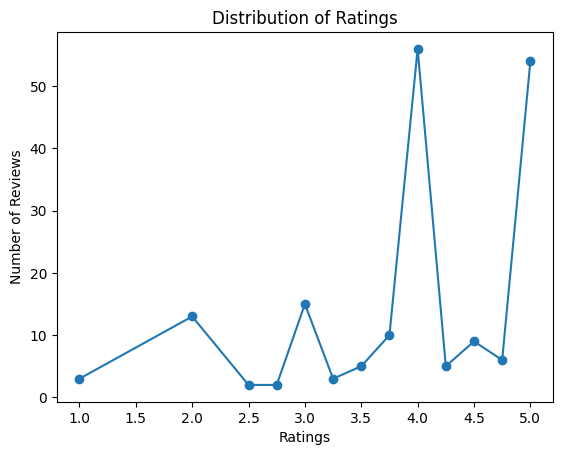

In [126]:
Anna_Karenina_Book_Counts = Anna_Karenina_Book['bRating'].value_counts().sort_index()
plt.plot(Anna_Karenina_Book_Counts.index, Anna_Karenina_Book_Counts.values, marker='o')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()


In [128]:
value_counts = Anna_Karenina_Book['bRating'].value_counts()
value_counts

4.00    56
5.00    54
3.00    15
2.00    13
3.75    10
4.50     9
4.75     6
4.25     5
3.50     5
1.00     3
3.25     3
2.75     2
2.50     2
Name: bRating, dtype: int64

In [129]:
def categorize_reviews(rating):
    if rating <= 2.5:
        return 'Poor'
    elif rating <= 3.5:
        return 'Average'
    else:
        return 'Good'
Anna_Karenina_Book['bReviewCategory'] = Anna_Karenina_Book['bRating'].apply(categorize_reviews)
print(Anna_Karenina_Book)


                                                   URL Rating  \
0    https://app.thestorygraph.com/book_reviews/470...    4.0   
1    https://app.thestorygraph.com/book_reviews/470...    4.5   
2    https://app.thestorygraph.com/book_reviews/470...    5.0   
3    https://app.thestorygraph.com/book_reviews/470...   3.75   
4    https://app.thestorygraph.com/book_reviews/470...   3.75   
..                                                 ...    ...   
178  https://app.thestorygraph.com/book_reviews/470...    4.0   
179  https://app.thestorygraph.com/book_reviews/470...    4.0   
180  https://app.thestorygraph.com/book_reviews/470...    5.0   
181  https://app.thestorygraph.com/book_reviews/470...   3.75   
182  https://app.thestorygraph.com/book_reviews/470...    3.5   

                                                Review  bRating  \
0                                         God fkn damn     4.00   
1                                         I love drama     4.50   
2    Started readi

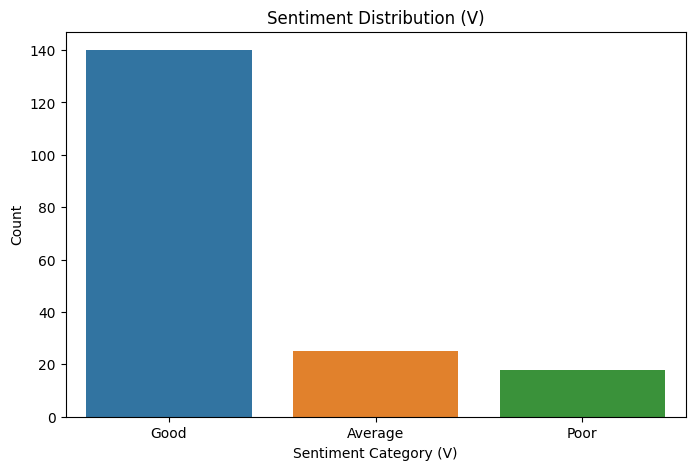

In [130]:
#creating a bar plot based on the categories
plt.figure(figsize=(8, 5))
sns.countplot(data=Anna_Karenina_Book, x='bReviewCategory')
plt.title('Sentiment Distribution (V)')
plt.xlabel('Sentiment Category (V)')
plt.ylabel('Count')
plt.savefig('sentiment_distribution.jpg', dpi=300)
plt.show()


In [133]:
#count of categories cross verification
unique_counts = Anna_Karenina_Book['bReviewCategory'].value_counts()
unique_counts

Good       140
Average     25
Poor        18
Name: bReviewCategory, dtype: int64

In [135]:
#cleaning data like removing stop words, tokenization and checking for only english comments and dropping rows not in english 
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text
Anna_Karenina_Book['PreprocessedReviews'] = Anna_Karenina_Book['Review'].apply(preprocess_text)
print(Anna_Karenina_Book)


                                                   URL Rating  \
0    https://app.thestorygraph.com/book_reviews/470...    4.0   
1    https://app.thestorygraph.com/book_reviews/470...    4.5   
2    https://app.thestorygraph.com/book_reviews/470...    5.0   
3    https://app.thestorygraph.com/book_reviews/470...   3.75   
4    https://app.thestorygraph.com/book_reviews/470...   3.75   
..                                                 ...    ...   
178  https://app.thestorygraph.com/book_reviews/470...    4.0   
179  https://app.thestorygraph.com/book_reviews/470...    4.0   
180  https://app.thestorygraph.com/book_reviews/470...    5.0   
181  https://app.thestorygraph.com/book_reviews/470...   3.75   
182  https://app.thestorygraph.com/book_reviews/470...    3.5   

                                                Review  bRating  \
0                                         God fkn damn     4.00   
1                                         I love drama     4.50   
2    Started readi

In [136]:
#english lang detect
from langdetect import detect
def detect_language(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

Anna_Karenina_Book['IsEnglish'] = Anna_Karenina_Book['PreprocessedReviews'].apply(detect_language)
Anna_Karenina_Book = Anna_Karenina_Book[Anna_Karenina_Book['IsEnglish']]

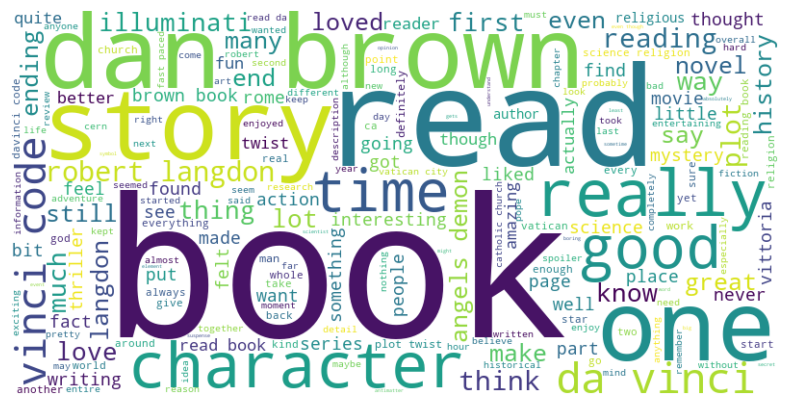

In [137]:
ak_book_reviews = ' '.join(Anna_Karenina_Book['PreprocessedReviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(abc_book_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



**NB Multinomial**

In [138]:
#NB Multinomial:
train_data, test_data = train_test_split(Anna_Karenina_Book, test_size=0.2, random_state = 42)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['PreprocessedReviews'])
X_test = vectorizer.transform(test_data['PreprocessedReviews'])
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, train_data['bReviewCategory'])
predictions = nb_classifier.predict(X_test)
accuracy = accuracy_score(test_data['bReviewCategory'], predictions)
AKNB = classification_report(test_data['bReviewCategory'], predictions,  zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(AKNB)

Accuracy: 0.76
              precision    recall  f1-score   support

     Average       0.00      0.00      1.00         3
        Good       0.81      0.96      0.88        23
        Poor       1.00      0.00      0.00         3

    accuracy                           0.76        29
   macro avg       0.60      0.32      0.63        29
weighted avg       0.75      0.76      0.80        29



In [8]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 183
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt1781769/reviews/?ref_=tt_ov_rt"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="content"]')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

Anna_Karenina_Movie = pd.DataFrame(data, columns=["URL", "Rating", "Review"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Button clicked
Collected 19 reviews
Collected 20 reviews
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 reviews
Collected 47 

In [10]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 200

data = []  
url = "https://app.thestorygraph.com/book_reviews/c1d3260f-7d82-4dfe-8091-3021912c7298"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

BeoWulf_Book = pd.DataFrame(data, columns=["URL", "Rating", "Review"])


4.0
the Seamus Heany translation is best! HWAT!
5.0
I would give this 4.5 stars but I’m rounding up. This translation makes Beowulf fun again — it feels like the bragging, boasting, oh-yeah-I-can-top-THAT kind of story it really is, rather than being corseted by overly-formal language (and I say this as someone who has read and loved Seamus Heaney’s version!). For those who like the idea of Beowulf but have found the writing to be inaccessible, this is the perfect entry point to just jump in and enjoy the story.
4.0
actually rlly enjoyed this, and i think this is the first time i've immediately  understood what makes a great translation without it having to be explained to me in lecture (tho the lecture did help)
4.0
Ich finde es sehr schwer ein solches Buch zu bewerten, da der originale Text so alt ist, dass der moderne Leser eindeutig etwas mehr Arbeit investieren muss um so viel wie möglich zu verstehen. Alles in allem ist dies jedoch eine sehr gut lesbare und meiner Meinung nach ge

In [11]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 200
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt0442933/reviews/?ref_=tt_ql_2"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="content"]')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

BeoWulf_Movie = pd.DataFrame(data, columns=["URL", "Rating", "Review"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Button clicked
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Collected 19 reviews
Collected 20 reviews
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 reviews
Collected 47 

In [12]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 200

data = []  
url = "https://app.thestorygraph.com/book_reviews/12cda909-ad4a-4f38-b86a-81ee1c232533"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

BGF_Book = pd.DataFrame(data, columns=["URL", "Rating", "Review"])


4.0
I enjoyed reading this aloud to my daughter- she enjoyed it too. I'm not sure if I would have rated it as highly if I were reading it for my own pleasure. Also, I missed about 3 or 4 chapters because my husband read those ones and I didn't go back and read them for myself. I do feel like I want to go back and read the whole encounter with the Queen, because I missed a lot there.

I think we'll be reading more Dahl books in my house.
2.75
first read: in the early nineties?
read again: march 2014. it had been long enough that i forgot how parts of it went, which made re-reading really fun.
read yet again: August 2019, for Roald Dahl book club.
5.0
⭐⭐⭐⭐
I really like this book . It’s a very enjoyable story, but just short of epic. Certain areas may not be as fulfilling as they could have been. I’m not quite as captivated or blown away, but still had a great experience. I’d recommend this book to others and continue reading from this author. I would probably re-read it.
3.0
I feel like

In [13]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 200
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt3691740/reviews/?ref_=tt_ql_2"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="content"]')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

BGF_Movie = pd.DataFrame(data, columns=["URL", "Rating", "Review"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Collected 19 reviews
Button clicked
Collected 20 reviews
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 reviews
Collected 47 

In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 190

data = []  
url = "https://app.thestorygraph.com/book_reviews/331a49c7-9ce5-43cb-8ade-88856352fbf2"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

The_Boy_in_the_Striped_Pajamas_Book = pd.DataFrame(data, columns=["URL", "Rating", "Review"])


4.5
I really enjoyed this book. In all honesty, I didn't figure out what was going to happen until the very last chapter, which made the book even better for me. It is a very easy read and I have no problem with giving it to 11 year old to read. I will definitely re-read it and read the Reader's Guide at the end.
4.0
I like it, but it wasn't what I had in mind.
3.5
SAD
3.0
Utterly disappointed
4.0
Very powerful. And so unbelievably sad.
2.0
a holocaust story from a new perspective- the naive 9 year old son of an S.S. official who is relocated to from berlin to auschwitz to run the camp there. bruno is a sheltered boy who doesn't understand what's going on around him, and telling the story from his viewpoint makes the reality of the holocaust all the more frightfully senseless: why are these people on this side of the fence different from the people on the other side of the fence?

this worked well for me. try reading it as the fable it is without worrying about the plausibility of the 

In [18]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 190
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt0914798/reviews/?ref_=tt_ql_2"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="content"]')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

The_Boy_in_the_Striped_Pajamas_Movie = pd.DataFrame(data, columns=["URL", "Rating", "Review"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Collected 19 reviews
Button clicked
Collected 20 reviews
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 reviews
Collected 47 

In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 200

data = []  
url = "https://app.thestorygraph.com/book_reviews/7b6f973a-e359-4093-85f0-fbca1ab511c7"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

Bridge_to_Terabithia_Book = pd.DataFrame(data, columns=["URL", "Rating", "Review"])


5.0
Still my favorite book ever.
5.0
Goddamnit
3.0
Wonderful
4.0
"Ain't 'cha gonna run?" she asked.
"No," he said, shoving the sheet away. "I'm gonna fly."

It was one of my favorite books growing up, and then one of my favorite movies. So many memories surround this story -- me and my brother watching it late at night with barely enough sound on the small TV not to wake our parents, me sobbing under my blanket having trouble turning the next page, us imagining a world much like Terabithia for ourselves, and then when my little sister was old enough for me to show it to her.
It is, in a way, a founding story of who I am.
4.25
embarrassing fun fact about me! i never finished this book when i was little. i started it, but i ditched it before *that* chapter because i wasn’t prepared for the emotional turmoil it would cause me, and then i just simply never picked it up again. after like over a decade i finally remembered to reread and properly finish 💀

there’s not much i can say about thi

In [21]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 200
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt0398808/reviews/?ref_=tt_ql_2"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="content"]')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

Bridge_to_Terabithia_Movie = pd.DataFrame(data, columns=["URL", "Rating", "Review"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Button clicked
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Collected 19 reviews
Collected 20 reviews
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Button clicked
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 review

In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)

ratings_to_collect = 200

data = []  
url = "https://app.thestorygraph.com/book_reviews/28b5a090-939e-4a74-b354-86962669e379"
try:
    driver.get(url)
    collected_ratings = 0  # Reset collected_ratings for each URL
    collected_reviews = set()  # Keep track of collected reviews
    while collected_ratings < ratings_to_collect:
        try:
            ratings = WebDriverWait(driver, 20).until(
                EC.presence_of_all_elements_located((By.XPATH, '//p[@class="mb-2"]'))
            )
            reviews = driver.find_elements(By.XPATH, '//div[contains(@class, "review-explanation")]')
            for rating, review in zip(ratings, reviews):
                review_text = review.text
                if review_text not in collected_reviews:
                    url_rating_review = (url, rating.text, review_text)
                    data.append(url_rating_review)
                    collected_reviews.add(review_text)
                    collected_ratings += 1
                    print(rating.text)
                    print(review_text)
                    if collected_ratings >= ratings_to_collect or len(reviews) < len(ratings):
                        break
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

The_call_of_the_wild_Book = pd.DataFrame(data, columns=["URL", "Rating", "Review"])


4.0
one of the first few books i've read. it was pretty interesting and I loved the experience. it really portrayed the dog that once lived in a friendly environment has turned into a ferocious and dangerous wolf. Jack London has written so many incredible books and The Call of The Wild is one of those beautifully written and taught us how to acquire bravery, this royalty, loving, and caring bond between us humans and wild animals in such horrendous habitats. would recommend this book to everyone who hasn't!
5.0
Mannn, this was depressing.

The Call of the Wild really drives home to me just how crazy it is that we continue to normalise animal labour in the same way we did centuries ago. The scenes here are stark and void of description, presenting the facts as they are in all their cold brutality, and it's really rough. The abuse and torture is almost unbearable to endure, but perhaps most unbearable is the acknowledgement that there is no going back after one (human or animal) has fac

In [23]:
firefox_options = Options()
firefox_options.add_argument('-headless')
firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"
firefox_options.binary_location = firefox_binary_path
service = Service(executable_path=r"C:\Users\Ajay\Downloads\geckodriver-v0.33.0-win32\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=firefox_options)
reviews_to_collect = 200
reviews_collected = 0
data = []  
url = "https://www.imdb.com/title/tt7504726/reviews/?ref_=tt_ql_2"
try:
    driver.get(url)
    while reviews_collected < reviews_to_collect:
        try:
            loadMoreBtn = WebDriverWait(driver, 60).until(
                EC.element_to_be_clickable((By.ID, 'load-more-trigger'))
            )
            if loadMoreBtn:
                loadMoreBtn.click()
                print('Button clicked')
                
                WebDriverWait(driver, 30).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//div[@class="content"]'))
                )
                
                reviews = driver.find_elements(By.XPATH, '//div[@class="content"]')
                ratings = driver.find_elements(By.XPATH, '//span[@class="rating-other-user-rating"]/span[1]')
                
                for review, rating in zip(reviews, ratings):
                    review_text = review.text
                    rating_text = rating.text
                    if rating_text and review_text:
                        url_rating_review = (url, rating_text, review_text)
                        data.append(url_rating_review)
                        reviews_collected += 1
                        print(f"Collected {reviews_collected} reviews")
                        if reviews_collected >= reviews_to_collect:
                            break
        except Exception as e:
            print(f"Error while scraping {url}: {e}")
            break

except Exception as e:
    print(f"Error: {e}")

finally:
    driver.quit()

The_call_of_the_wild_Movie = pd.DataFrame(data, columns=["URL", "Rating", "Review"])

Button clicked
Collected 1 reviews
Collected 2 reviews
Collected 3 reviews
Collected 4 reviews
Collected 5 reviews
Collected 6 reviews
Collected 7 reviews
Collected 8 reviews
Collected 9 reviews
Collected 10 reviews
Collected 11 reviews
Collected 12 reviews
Collected 13 reviews
Collected 14 reviews
Collected 15 reviews
Collected 16 reviews
Collected 17 reviews
Collected 18 reviews
Collected 19 reviews
Collected 20 reviews
Button clicked
Collected 21 reviews
Collected 22 reviews
Collected 23 reviews
Collected 24 reviews
Collected 25 reviews
Collected 26 reviews
Collected 27 reviews
Collected 28 reviews
Collected 29 reviews
Collected 30 reviews
Collected 31 reviews
Collected 32 reviews
Collected 33 reviews
Collected 34 reviews
Collected 35 reviews
Collected 36 reviews
Collected 37 reviews
Collected 38 reviews
Collected 39 reviews
Collected 40 reviews
Collected 41 reviews
Collected 42 reviews
Collected 43 reviews
Collected 44 reviews
Collected 45 reviews
Collected 46 reviews
Collected 47 